# Predicting Total Rent and Performing EDA on the given Data

#### Loading all the Important Libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

#### Loading the data locally from directory using pandas
##### Data can be downloaded from kaggle datasets https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent

In [54]:
rt2=pd.read_csv('houses_to_rent_v2.csv')
rt2.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [55]:
rt2.shape

(10692, 13)

##### We find if there is any null value in any of the columns. If there would have been any we would either delete the specific data entry or choose mean or median to replace the Nan value

In [56]:
rt2.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [57]:
rt2.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [58]:
print(rt2.city.unique())
print(rt2.animal.unique())

['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
['acept' 'not acept']


## Text preprocessing 
- ##### Renaming The coolumns to simple string such as *property tax (R\\$)* to *property tax*
- ##### Replacing *acept* and *not acept* values with 0 and 1 respectively
- ##### Replacing '\-' sign with 0
- ##### Removing ' , ' in the columns that enlisted prices

In [59]:
rt2=rt2.replace('acept',1)
rt2=rt2.replace('not acept',0)
rt2['furniture']=rt2['furniture'].replace('not furnished',0)
rt2['furniture']=rt2['furniture'].replace('furnished',1)
rt2=rt2.replace('-',0)
rt2.replace(regex=[r'\b,'],value='',inplace=True)
rt2=rt2.rename(columns={'hoa (R$)': 'hoa', 'property tax (R$)': 'property tax','fire insurance (R$)': 'fire insurance','rent amount (R$)': 'rent amount','total (R$)':'total'})

In [60]:
rt2.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,0,0,0,800,25,11,836


In [61]:
rt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
city              10692 non-null object
area              10692 non-null int64
rooms             10692 non-null int64
bathroom          10692 non-null int64
parking spaces    10692 non-null int64
floor             10692 non-null object
animal            10692 non-null int64
furniture         10692 non-null int64
hoa               10692 non-null int64
rent amount       10692 non-null int64
property tax      10692 non-null int64
fire insurance    10692 non-null int64
total             10692 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.1+ MB


#### We still have some columns with datatype as object which is changed to int64 for analysis

In [62]:
rt2['floor']=rt2['floor'].astype('int64')
rt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
city              10692 non-null object
area              10692 non-null int64
rooms             10692 non-null int64
bathroom          10692 non-null int64
parking spaces    10692 non-null int64
floor             10692 non-null int64
animal            10692 non-null int64
furniture         10692 non-null int64
hoa               10692 non-null int64
rent amount       10692 non-null int64
property tax      10692 non-null int64
fire insurance    10692 non-null int64
total             10692 non-null int64
dtypes: int64(12), object(1)
memory usage: 1.1+ MB


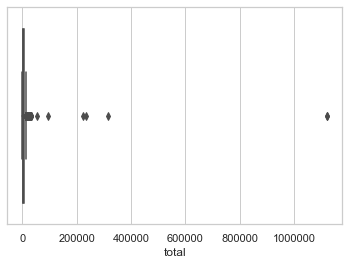

In [63]:
sns.boxplot('total',data=rt2)

### Removing Outliers

In [64]:
q1=rt2.total.quantile(0.75)
q3=rt2.total.quantile(0.25)
IQR=q1-q3
data=rt2[(rt2['total']<=(q1+1.5*IQR)) & (rt2['total']>=(q3-1.5*IQR))]

In [65]:
print("Before Outlier Removal")
print("No of Rows = ",rt2.shape[0])
print("After Outlier Removal")
print("No of Rows = ",data.shape[0])

Before Outlier Removal
No of Rows =  10692
After Outlier Removal
No of Rows =  9986


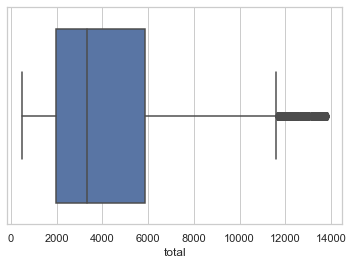

In [66]:
sns.boxplot('total',data=data)

### Comparing Spread of Data Entry Points *Before* and *After* Removing Outlier

- #### Area

Text(0.5, 1.0, 'Before Removing Outlier')

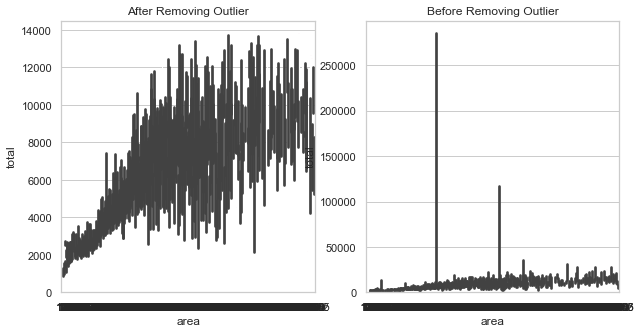

In [67]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.set(style = "whitegrid")
f=sns.barplot('area','total',data=data)
f.set_title("After Removing Outlier")
plt.subplot(1,2,2)
f=sns.barplot('area','total',data=rt2)
f.set_title("Before Removing Outlier")

- #### Number of Floors

Text(0.5, 1.0, 'Before Removing Outlier')

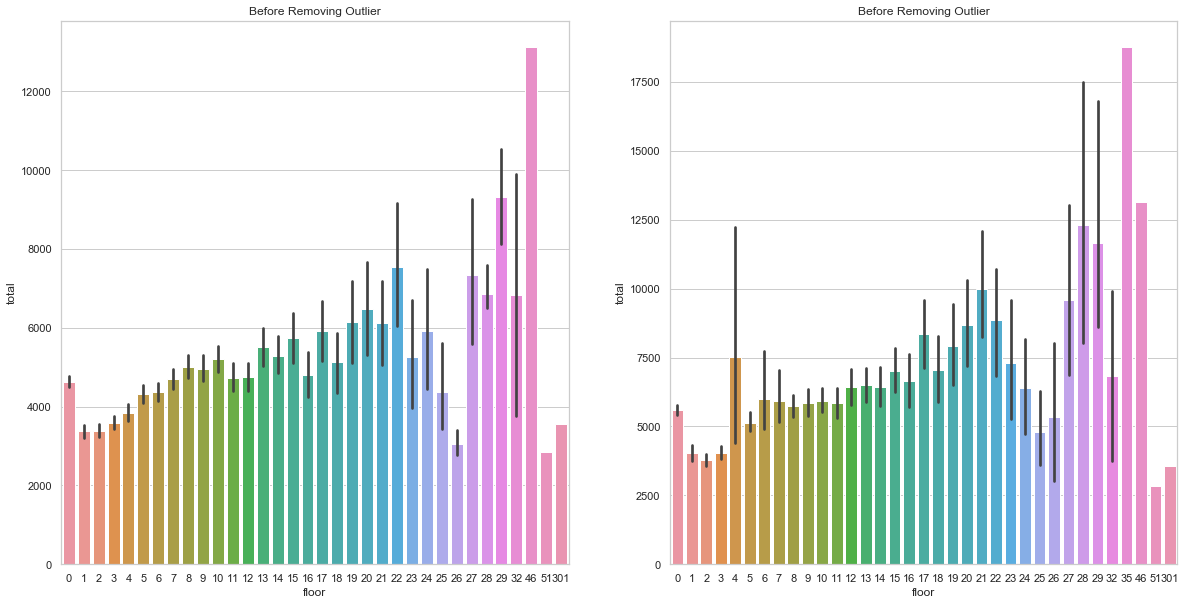

In [68]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
f=sns.barplot('floor','total',data=data)
f.set_title("Before Removing Outlier")
plt.subplot(1,2,2)
f=sns.barplot('floor','total',data=rt2)
f.set_title("Before Removing Outlier")

- #### If Animal is Permitted or Not

Text(0.5, 1.0, 'Before Removing Outlier')

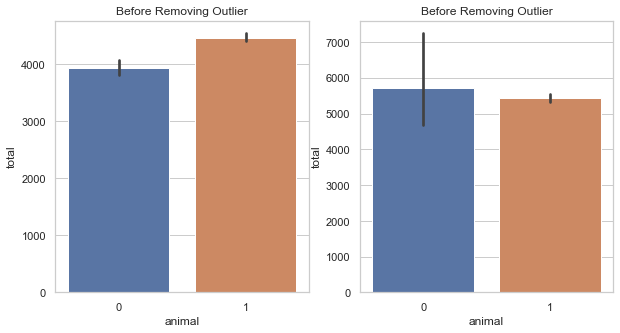

In [69]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
f=sns.barplot('animal','total',data=data)
f.set_title("Before Removing Outlier")
plt.subplot(1,2,2)
f=sns.barplot('animal','total',data=rt2)
f.set_title("Before Removing Outlier")

- #### Furnished Or Unfurnished House

Text(0.5, 1.0, 'Before Removing Outlier')

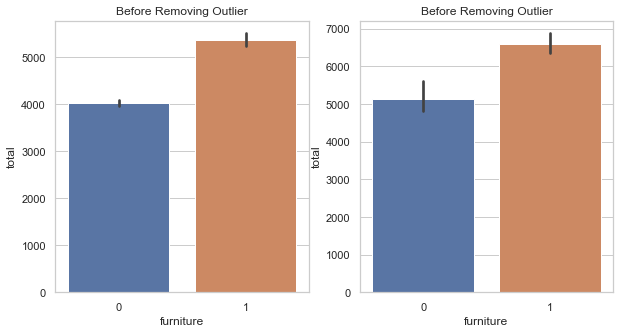

In [70]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
f=sns.barplot('furniture','total',data=data)
f.set_title("Before Removing Outlier")
plt.subplot(1,2,2)
f=sns.barplot('furniture','total',data=rt2)
f.set_title("Before Removing Outlier")

- #### No. of Bathrooms

Text(0.5, 1.0, 'Before Removing Outlier')

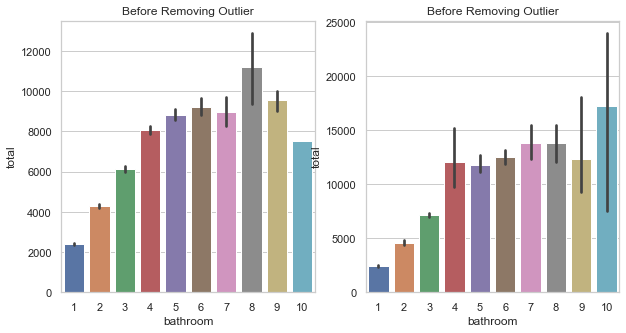

In [71]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
f=sns.barplot('bathroom','total',data=data)
f.set_title("Before Removing Outlier")
plt.subplot(1,2,2)
f=sns.barplot('bathroom','total',data=rt2)
f.set_title("Before Removing Outlier")

### KDE plot for *Total Cost*

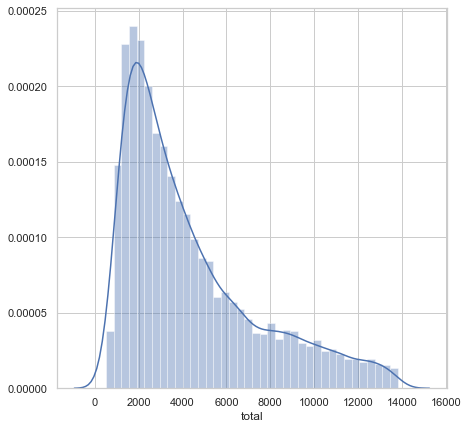

In [72]:
plt.figure(figsize = (7,7))
sns.set(style = "whitegrid")
f = sns.distplot(data["total"])

### Citywise Distribution of Total Cost
We observe that average prices are higher in cities

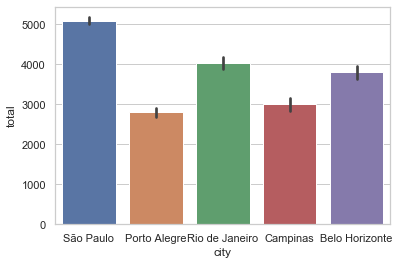

In [73]:
sns.barplot('city','total',data=data)

### Heatmap of Correlation Matrix
#### It is important to note that after removing *outliers*, __Strong Correlation__ is observed between different features and Total Price
##### The left one corresponds to before removing outlier, while left one is for the data obtained after removing outliers

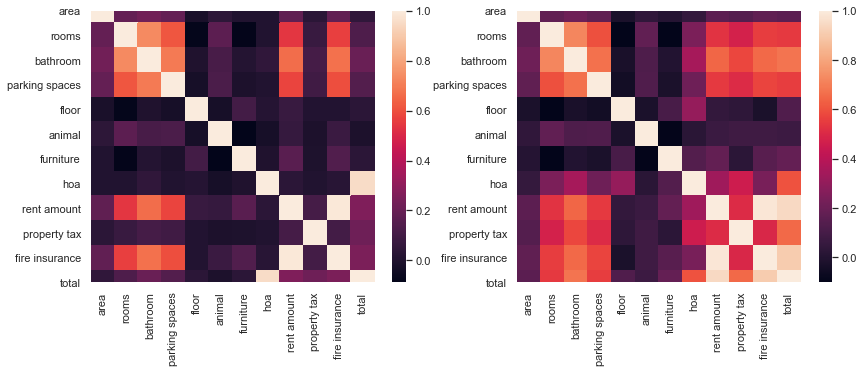

In [74]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.heatmap(rt2.corr())
plt.subplot(1,2,2)
sns.heatmap(data.corr())

### Predicting Prices for Test Data Using Different Machine Learning Models

In [149]:
x=data.drop(columns=['total','city'])
y=data[['total']]
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1)

- #### Linear Regression

In [150]:
model=linear_model.LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error", np.sqrt(mse))

Mean Squared Error 12.011556439950155


- #### Random Forest Classifier

In [110]:
model_rfc = RandomForestClassifier(max_depth=7)
model_rfc.fit(x_train, y_train.values.ravel())
y_pred_rfc=model_rfc.predict(x_test)
mse = mean_squared_error(y_test, y_pred_rfc)
print("Mean Squared Error", np.sqrt(mse))

C:\Users\DELL\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Mean Squared Error 1468.7770525270437


- #### K Nearest Neighbors 

In [116]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
knn =  KNeighborsRegressor()
model = knn.fit(x_train,y_train)
y_pred_knn = model.predict(x_test)
mse=mean_squared_error(y_test,y_pred_knn)
print("Mean Squared Error", np.sqrt(mse))

Mean Squared Error 99.28721464010857


#### We observe that LOSS as evaluated RMSE (Root Mean Square Error) is minimum in Linear Regression and it fits best on the data with a permissible loss

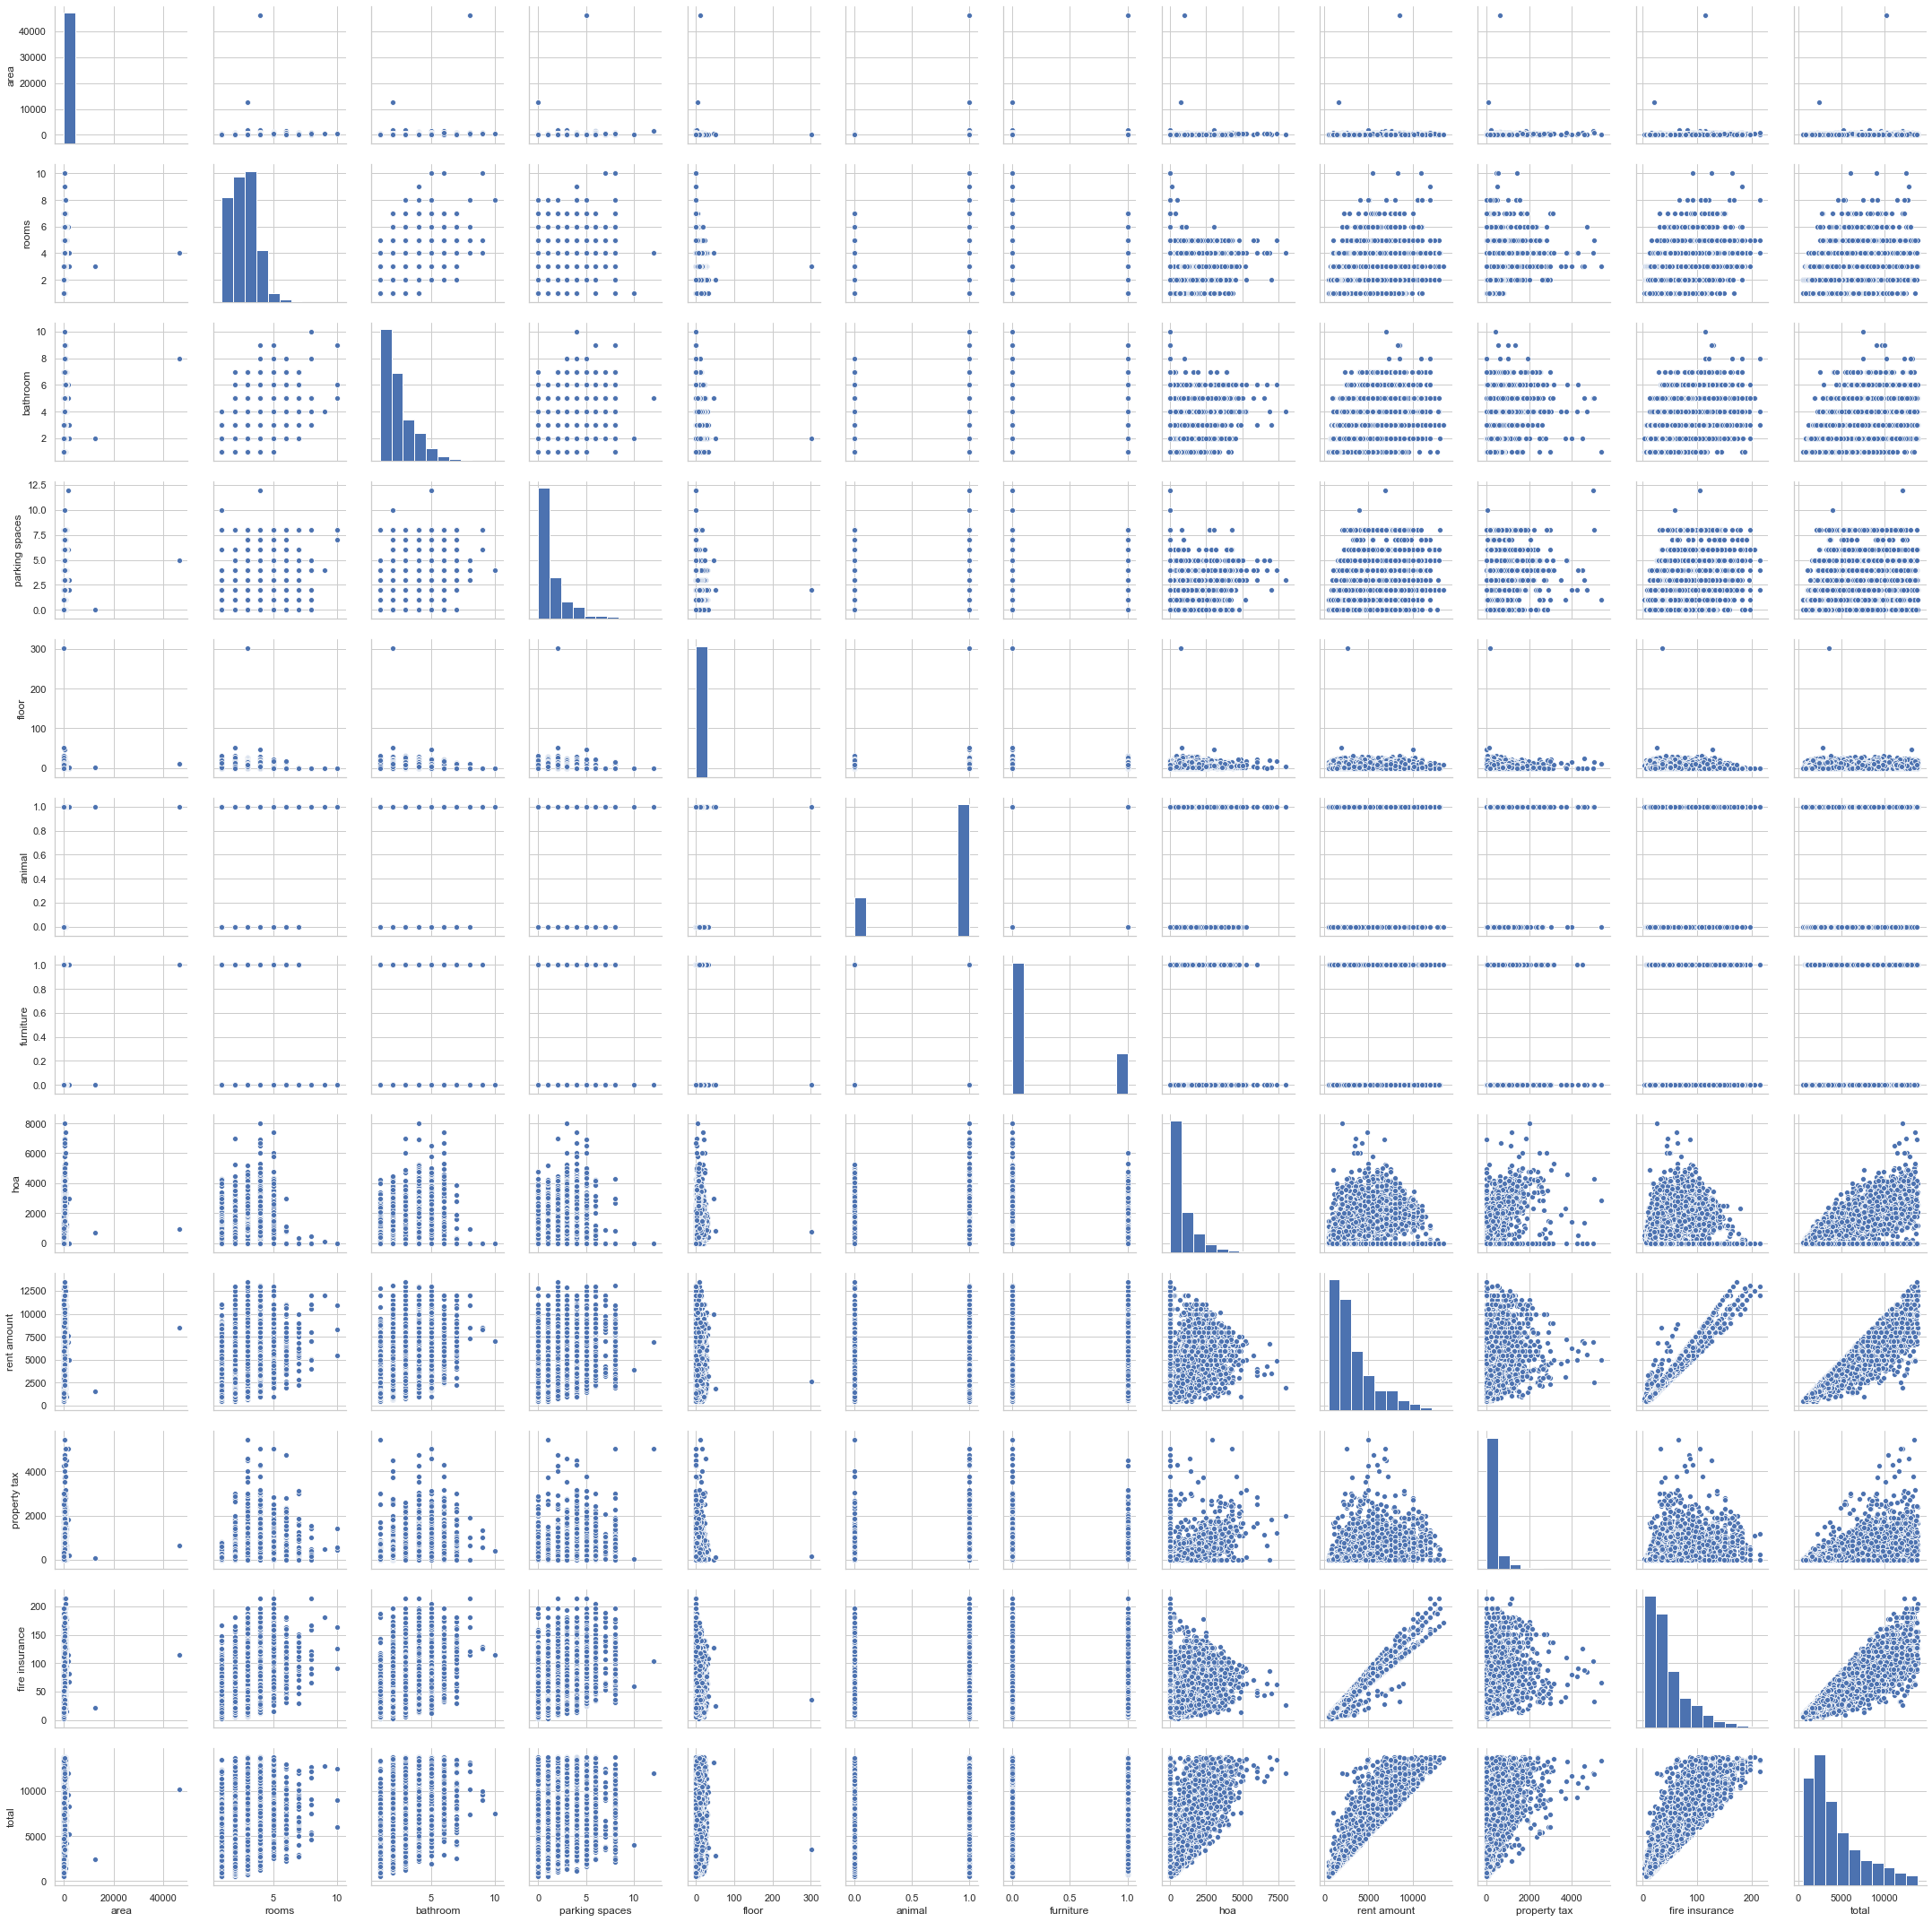

In [117]:
sns.pairplot(data)